# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

In [4]:
# %pip install seaborn
# %pip install pandas
# %pip install matplotlib
# %pip install nbformat
%pip install --upgrade nbformat


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [5]:
%pip install --upgrade plotly

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
>>> (4324, 9)

* How many rows and columns does it have?
>>> [4324 rows x 9 columns]

* What are the column names?
>>> ['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status']

* Are there any NaN values or duplicates?
>>> There are Nan values but no duplicates.

In [11]:
df_data.shape

(4324, 9)

In [12]:
df_data.describe

<bound method NDFrame.describe of       Unnamed: 0.1  Unnamed: 0 Organisation  \
0                0           0       SpaceX   
1                1           1         CASC   
2                2           2       SpaceX   
3                3           3    Roscosmos   
4                4           4          ULA   
...            ...         ...          ...   
4319          4319        4319      US Navy   
4320          4320        4320         AMBA   
4321          4321        4321      US Navy   
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                         Pad A, Boca Chica, Texas, USA   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
...                                            

In [13]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [14]:
df_data.isnull().values.any()

True

In [15]:
df_data.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [4]:
no_null_df = df_data.dropna()

In [5]:
# no null and no duplicated values
clean_df = no_null_df.drop_duplicates()

## Descriptive Statistics

In [295]:
clean_df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,964.00,964.00,964,964,964,964,964,964,964
unique,NaN,NaN,25,56,963,962,2,56,4
top,NaN,NaN,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,450.0,Success
freq,NaN,NaN,158,120,2,2,586,136,910
mean,858.49,858.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,784.21,784.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,324.75,324.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,660.50,660.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"1,112.00","1,112.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
clean_df['Price'].describe()

count       964
unique       56
top       450.0
freq        136
Name: Price, dtype: object

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [296]:
clean_df.groupby('Organisation')['Mission_Status'].count()

Organisation
Arianespace         96
Boeing               7
CASC               158
EER                  1
ESA                  1
Eurockot            13
ExPace               1
ILS                 13
ISRO                67
JAXA                 3
Kosmotras           22
Lockheed             8
MHI                 37
Martin Marietta      9
NASA               149
Northrop            83
RVSN USSR            2
Rocket Lab          13
Roscosmos           23
Sandia               1
SpaceX              99
ULA                 98
US Air Force        26
VKS RF              33
Virgin Orbit         1
Name: Mission_Status, dtype: int64

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [297]:
clean_df.groupby('Rocket_Status')['Mission_Status'].count()

Rocket_Status
StatusActive     586
StatusRetired    378
Name: Mission_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [298]:
mission_status = clean_df.groupby('Mission_Status')['Organisation'].count()
mission_status


Mission_Status
Failure               36
Partial Failure       17
Prelaunch Failure      1
Success              910
Name: Organisation, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3683,3683,3683,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 04, 1968 12:00 UTC",Saturn V | Apollo 6,StatusRetired,"1,160.0",Partial Failure
3149,3149,3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 14, 1973 17:30 UTC",Saturn V | Skylab 1,StatusRetired,"1,160.0",Success
3180,3180,3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,"1,160.0",Success
3243,3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.0",Success
3384,3384,3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jan 31, 1971 21:03 UTC",Saturn V | Apollo 14,StatusRetired,"1,160.0",Success
...,...,...,...,...,...,...,...,...,...
510,510,510,MHI,"LA-Y1, Tanegashima Space Center, Japan","Thu Mar 26, 2015 01:21 UTC",H-IIA 202 | IGS-Optical 5,StatusActive,90.0,Success
365,365,365,MHI,"LA-Y1, Tanegashima Space Center, Japan","Fri Mar 17, 2017 01:20 UTC",H-IIA 202 | IGS-Radar 5,StatusActive,90.0,Success
146,146,146,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 11, 2019 22:35 UTC",Falcon Heavy | ArabSat 6A,StatusActive,90.0,Success
236,236,236,MHI,"LA-Y1, Tanegashima Space Center, Japan","Tue Jun 12, 2018 04:20 UTC",H-IIA 202 | IGS Radar-6,StatusActive,90.0,Success


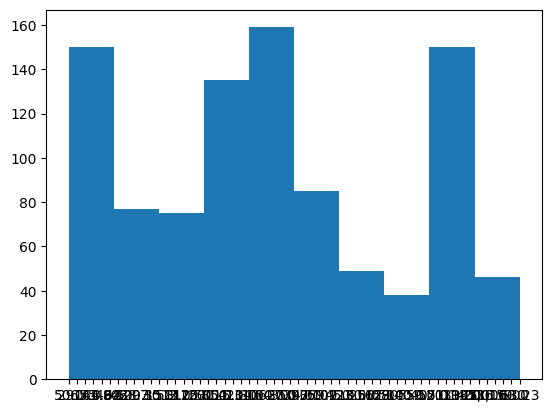

In [299]:
plt.hist(clean_df.Price)
clean_df.sort_values('Price',ascending=True)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [399]:
# clean_df.drop(columns='Country')
# clean_df = clean_df.drop(columns='Alpha3')
# country_code.head(30)
# clean_df.head(30)
# for i in country_code:
#     clean_df.iloc[i] = print(i[-1])
    # clean_df.loc['test'] = i[-1]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [6]:
clean_df['Country'] = clean_df['Location'].str.rsplit(',').str[-1].str.strip()

In [7]:
# modification for the names
clean_df.Country.replace('Pacific Missile Range Facility', 'USA', inplace=True)
clean_df['Country'].replace('Gran Canaria', 'USA', inplace=True)
clean_df.Country.replace('Yellow Sea', 'China', inplace=True)
clean_df.Country.replace('Russia', 'Russian Federation', inplace=True)
clean_df.groupby('Country')['Country'].count()
# clean_df

Country
China                 159
France                 95
India                  67
Japan                  40
Kazakhstan             46
New Zealand            13
Russian Federation     54
USA                   490
Name: Country, dtype: int64

In [9]:
# generate new column called alpha3 for country code.
# for i in clean_df['Country']:
#     # print(i)
#     # print(countries.get(i.strip()).alpha3)
#     print(countries.get(i.strip()).alpha3)

# countries.get(clean_df.Country).alpha3
# clean_df['Alpha3'] = countries.get(clean_df['Country']).alpha3
# for index, row in iterrow(clean_df):
#     print(index, row)

# countries_list = []
# for value in clean_df['Country']:
#     countries_list.append(countries.get(value).alpha3)
# countries_list
clean_df['Alpha3'] = countries_list


In [10]:
launch_per_country = clean_df.groupby('Alpha3')['Country'].count()
launch_per_country


Alpha3
CHN    159
FRA     95
IND     67
JPN     40
KAZ     46
NZL     13
RUS     54
USA    490
Name: Country, dtype: int64

In [34]:
fig = px.choropleth(launch_per_country, locations=launch_per_country.index, color=launch_per_country.values, color_discrete_sequence=["red", "blue"])
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [11]:
# fail_per_country = clean_df.groupby(['Alpha3','Mission_Status']).size().groupby(level=1).count()
fail_per_country = (clean_df['Mission_Status'] == 'Failure').groupby(clean_df.Alpha3).sum()
fail_per_country

Alpha3
CHN     4
FRA     2
IND     5
JPN     0
KAZ     2
NZL     2
RUS     1
USA    20
Name: Mission_Status, dtype: int64

In [12]:
fig = px.choropleth(fail_per_country, locations=fail_per_country.index, color=fail_per_country.values, color_discrete_sequence=["red", "blue"])
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [206]:

country_grp = clean_df.groupby(['Country','Organisation'])


In [211]:
country_mission_group = country_grp['Mission_Status'].value_counts()
country_mission_group

Country             Organisation     Mission_Status   
China               CASC             Success              152
                                     Failure                3
                                     Partial Failure        3
                    ExPace           Failure                1
France              Arianespace      Success               91
                                     Failure                2
                                     Partial Failure        1
                    ESA              Success                1
India               ISRO             Success               59
                                     Failure                5
                                     Partial Failure        3
Japan               JAXA             Success                3
                    MHI              Success               37
Kazakhstan          Arianespace      Success                2
                    ILS              Success                5
               

In [219]:
fig = px.sunburst(clean_df,
                  path=['Country','Organisation','Mission_Status']
)
fig.show()

In [242]:
clean_df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Alpha3
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
...,...,...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success,USA,USA
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [290]:
clean_df_float = clean_df[['Organisation','Price']].copy()
clean_df_float['Price'] = clean_df_float['Price'].apply(lambda x: float(x.split()[0].replace(',', '')))
org_grp = clean_df_float.groupby('Organisation')
price_per_org = org_grp['Price'].sum().sort_values(ascending=False)
price_per_org


Organisation
NASA              76,280.00
Arianespace       16,345.00
ULA               14,798.00
RVSN USSR         10,000.00
CASC               6,340.26
SpaceX             5,444.00
Northrop           3,930.00
MHI                3,532.50
ISRO               2,177.00
US Air Force       1,550.92
VKS RF             1,548.90
ILS                1,320.00
Boeing             1,241.00
Roscosmos          1,187.50
Martin Marietta      721.40
Kosmotras            638.00
Eurockot             543.40
Lockheed             280.00
JAXA                 168.00
Rocket Lab            97.50
ESA                   37.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
Name: Price, dtype: float64

# Analyse the Amount of Money Spent by Organisation per Launch

In [306]:
amount_per_org_per_launch = clean_df[['Organisation', 'Price']]
amount_per_org_per_launch.sort_values('Price',ascending=True).drop_duplicates().head(50)

,Organisation,Price
3683,NASA,"1,160.0"
398,ULA,109.0
950,ILS,109.0
494,MHI,112.5
691,ULA,115.0
925,ILS,115.0
27,Virgin Orbit,12.0
712,ULA,120.0
826,ULA,123.0
385,ULA,130.0


# Chart the Number of Launches per Year

In [413]:
launch_per_year = clean_df[['Date','Organisation']]
launch_per_year['Date'] = launch_per_year['Date'].apply(lambda x: int(x.split()[3]))

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\2999540321.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [414]:
launch_per_year = launch_per_year.groupby('Date').count()
launch_per_year


,Organisation
Date,
1964,2
1965,2
1966,3
1967,8
1968,10
1969,8
1970,1
1971,2
1972,2


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [418]:
launch_per_month = clean_df[['Date','Organisation']]
launch_per_month['Date'] = launch_per_month['Date'].apply(lambda x: str(x.split()[1]) + ' ' +  str(x.split()[3]))

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\2443366219.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [428]:
launch_per_month = launch_per_month.groupby('Date').count()
launch_per_month.head(50)

,Organisation
Date,
Apr 1967,1
Apr 1968,1
Apr 1969,1
Apr 1970,1
Apr 1972,1
Apr 1981,1
Apr 1983,1
Apr 1984,1
Apr 1985,1


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [463]:
famous_month = clean_df[['Date','Organisation']]
famous_month['Date'] = famous_month['Date'].apply(lambda x: str(x.split()[1]))
famous_month = famous_month.groupby('Date').count()

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\363401077.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [464]:
famous_month

,Organisation
Date,
Apr,91
Aug,82
Dec,92
Feb,60
Jan,66
Jul,77
Jun,85
Mar,77
May,86


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [472]:
avg_price = clean_df[['Date','Price']]
avg_price['Date'] = avg_price['Date'].apply(lambda x: int(x.split()[3]))
avg_price['Price'] = avg_price['Price'].apply(lambda x: float(x.split()[0].replace(',', '')))
avg_price = avg_price.groupby('Date').agg('Price').sum()

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\4124844657.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\4124844657.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [475]:
avg_price.head(80)

Date
1964     126.46
1965     126.46
1966     177.00
1967   1,573.00
1968   2,792.00
1969   4,876.00
1970   1,160.00
1971   2,320.00
1972   2,320.00
1973   1,160.00
1981     900.00
1982   1,380.80
1983   1,830.80
1984   2,280.80
1985   4,080.80
1986     930.80
1987   5,061.60
1988   5,965.80
1989   2,285.00
1990   3,180.60
1991   2,740.00
1992   3,832.15
1993   3,320.80
1994   3,544.15
1995   3,250.00
1996   3,404.75
1997   3,991.30
1998   2,738.20
1999   1,799.16
2000   2,769.90
2001   2,907.00
2002   3,154.96
2003   1,610.23
2004   1,576.51
2005   1,436.90
2006   3,742.36
2007   3,645.16
2008   3,632.95
2009   5,588.90
2010   4,303.60
2011   4,251.30
2012   3,057.30
2013   2,988.20
2014   4,204.60
2015   3,570.40
2016   5,085.27
2017   4,586.41
2018   5,697.98
2019   4,351.51
2020   2,945.81
Name: Price, dtype: float64

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [488]:
org_launch_ot = clean_df[['Date','Organisation']]
org_launch_ot['Date'] = org_launch_ot['Date'].apply(lambda x: int(x.split()[3]))
org_launch_ot = org_launch_ot.groupby(['Organisation','Date']).agg('Date').count().sort_values(ascending=False)

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\502355396.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [514]:
org_launch_ot.head(50)

Organisation  Date
CASC          2018    27
SpaceX        2018    21
CASC          2019    21
SpaceX        2017    18
CASC          2020    16
              2016    15
SpaceX        2019    13
              2020    13
ULA           2014    13
CASC          2017    12
ULA           2015    10
              2016    10
Arianespace   2015     9
NASA          1985     9
SpaceX        2016     9
ULA           2013     9
Northrop      1998     8
Roscosmos     2019     8
NASA          1992     8
              1997     8
Arianespace   2016     8
ULA           2012     8
US Air Force  1968     8
CASC          2007     8
              2004     8
ULA           2011     8
Arianespace   2017     8
ISRO          2018     7
Arianespace   2012     7
NASA          1993     7
              1994     7
              1995     7
ULA           2009     7
              2010     7
ISRO          2016     7
Arianespace   2018     7
US Air Force  1967     7
NASA          1996     7
SpaceX        2015     7
Ariane

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [518]:
cold_war_space_race = clean_df[['Country', 'Date']]
cold_war_space_race['Date'] = cold_war_space_race['Date'].apply(lambda x: int(x.split()[3]))
cold_war_space_race = cold_war_space_race[cold_war_space_race['Country'].isin(['USA', 'Russian Federation'])]
cold_war_space_race = cold_war_space_race[cold_war_space_race['Date'] <= 1991]

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\3633461920.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [517]:
cold_war_space_race.head(50)

,Country,Date
1724,USA,1991
1732,USA,1991
1741,USA,1991
1743,USA,1991
1750,USA,1991
1755,USA,1991
1760,USA,1991
1779,USA,1990
1787,USA,1990
1793,USA,1990


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [523]:
USSR_USA = clean_df[['Country', 'Date']]
USSR_USA['Date'] = USSR_USA['Date'].apply(lambda x: int(x.split()[3]))
USSR_USA = USSR_USA[USSR_USA['Country'].isin(['USA', 'Russian Federation'])]

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\1384956354.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date
Country,
Russian Federation,54
USA,490


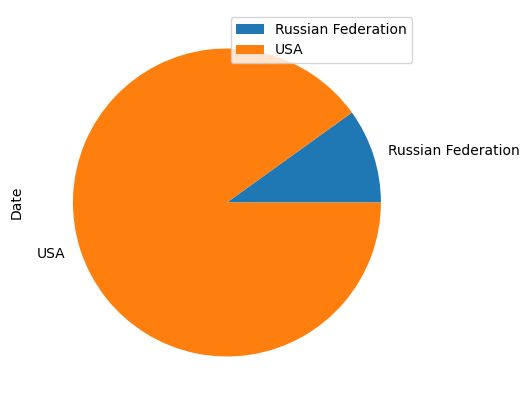

In [533]:
USSR_USA_grp = USSR_USA.groupby('Country').count()
plot = USSR_USA_grp.plot.pie(y='Date', figsize=(5, 5))
USSR_USA_grp

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [635]:
USA_launches = clean_df[['Country', 'Date']]
USA_launches['Date'] = USA_launches['Date'].apply(lambda x: int(x.split()[3]))
USA_launches = USA_launches[USA_launches['Country'].isin(['USA'])]

China_launches = clean_df[['Country', 'Date']]
China_launches['Date'] = China_launches['Date'].apply(lambda x: int(x.split()[3]))
China_launches = China_launches[China_launches['Country'].isin(['China'])]

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\2353755738.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\2353755738.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [638]:
USA_launches = USA_launches.groupby(['Country','Date']).agg(count=('Date', 'count')).reset_index()
USA_launches
China_launches = China_launches.groupby(['Country','Date']).agg(count=('Date', 'count')).reset_index()
China_launches

,Country,Date,count
0,China,1982,1
1,China,1983,1
2,China,1984,1
3,China,1985,1
4,China,1986,1
5,China,1987,2
6,China,1988,1
7,China,1990,1
8,China,1992,2
9,China,1993,1


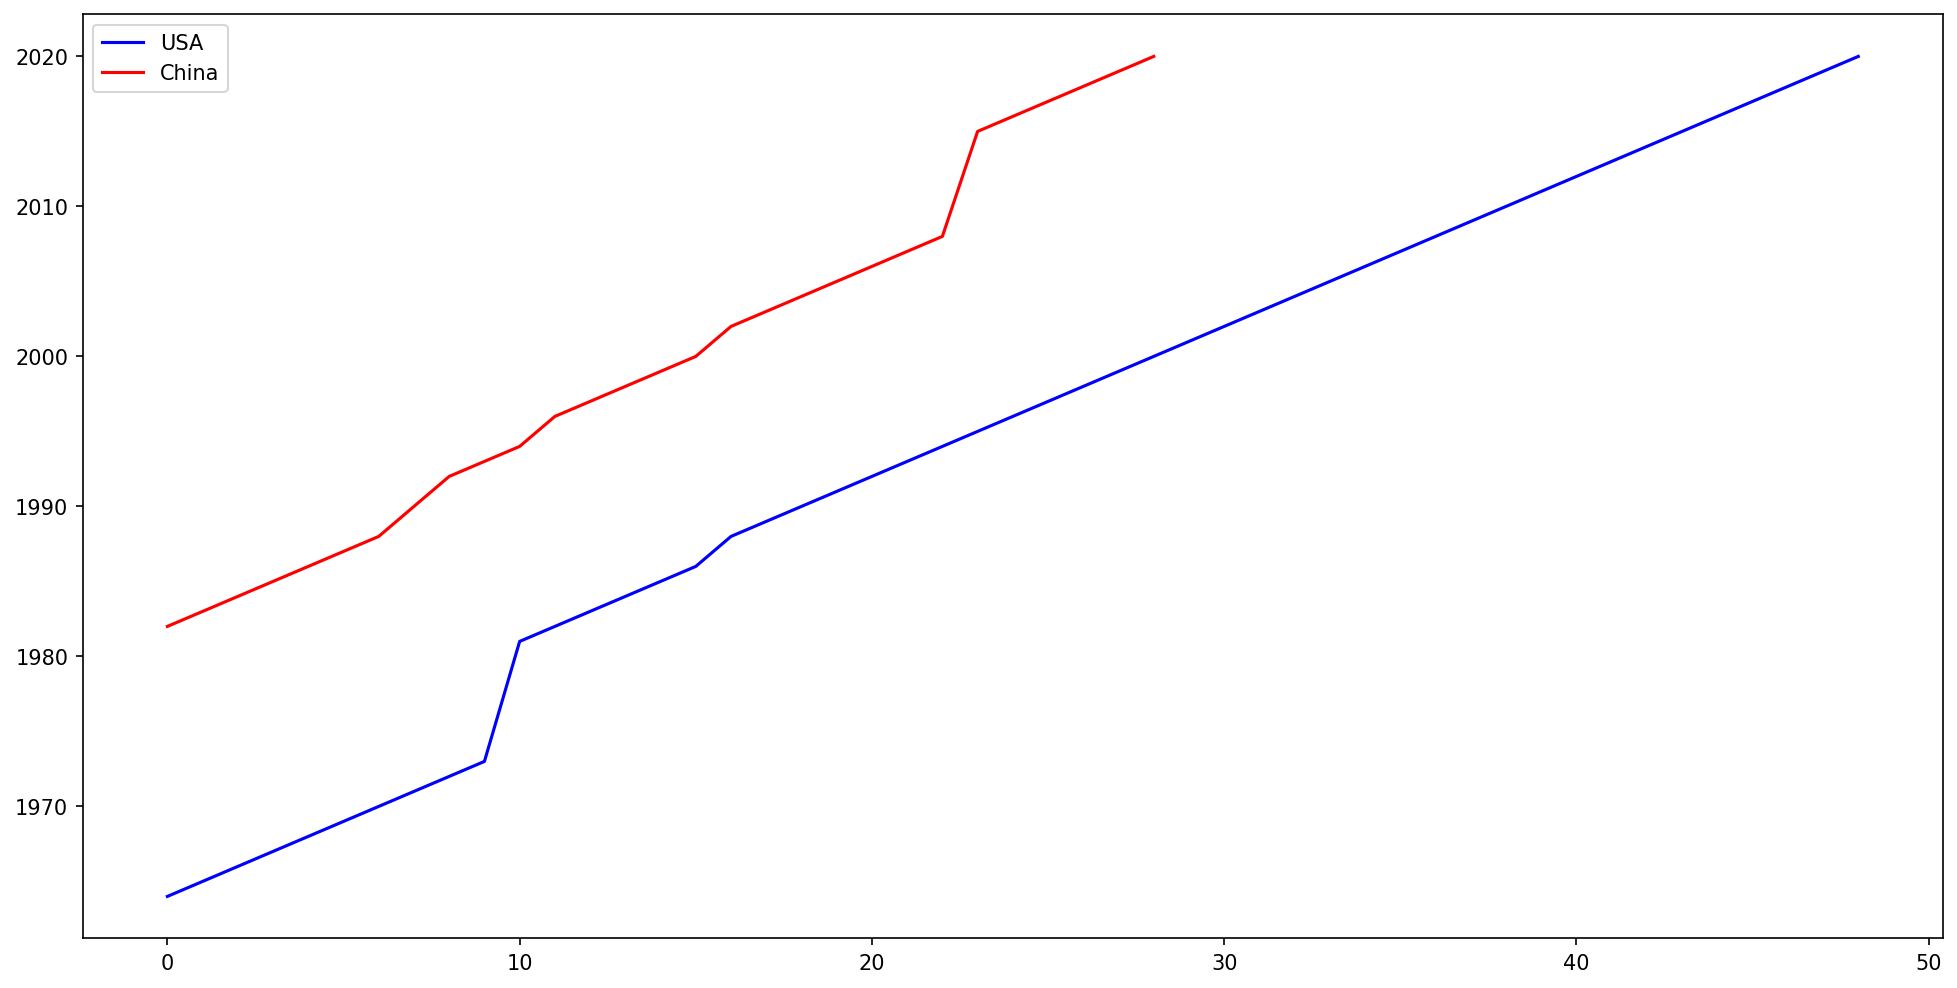

In [650]:
# ax = China_launches.plot(x='Date')
# USA_launches.plot(ax=ay)

plt.figure(figsize=(16, 8), dpi=150)
USA_launches['Date'].plot(label='USA', color='blue')
China_launches['Date'].plot(label='China', color='red')
plt.legend()

## Chart the Total Number of Mission Failures Year on Year.

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\3715201031.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: xlabel='Date'>

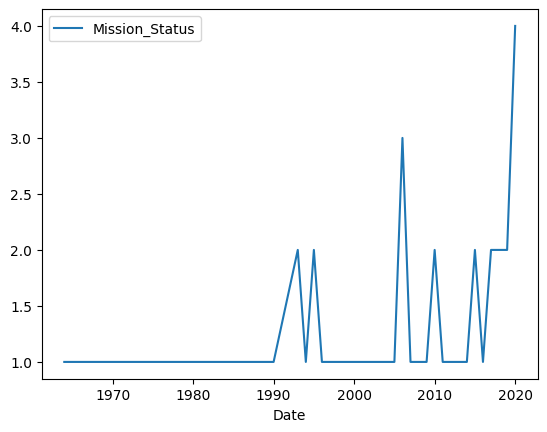

In [656]:
y2y_failure = clean_df[['Mission_Status', 'Date']]
y2y_failure['Date'] = y2y_failure['Date'].apply(lambda x: int(x.split()[3]))
y2y_failure = y2y_failure[y2y_failure['Mission_Status'].isin(['Failure'])]
y2y_failure.groupby('Date').count().plot()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [700]:
# y2y_total = clean_df[['Country','Mission_Status', 'Date']]
# y2y_total['Date'] = y2y_total['Date'].apply(lambda x: int(x.split()[3]))
# y2y_total = y2y_total.groupby(['Country','Date']).agg(total_count=('Mission_Status', 'count')).reset_index()
# y2y_total

y2y_failure_of_total = clean_df[['Country','Mission_Status', 'Date']]
y2y_failure_of_total['Date'] = y2y_failure_of_total['Date'].apply(lambda x: int(x.split()[3]))
# y2y_failure_of_total = y2y_failure_of_total[y2y_failure_of_total['Mission_Status'].isin(['Failure'])]
# y2y_failure_of_total = y2y_failure_of_total.groupby(['Country','Date']).agg(fail_count=('Mission_Status', 'count'), total_count=('Mission_Status','count')).reset_index()
y2y_failure_of_total.assign(total_fail = np.where(y2y_failure_of_total['Mission_Status']=='Failure',y2y_failure_of_total['Mission_Status'],0)).groupby('Country').agg({'total_fail':sum})

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\420649491.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [678]:
# y2y_total['percentage'] = y2y_failure_of_total[y2y_failure_of_total['Country','Date']==y2y_total['Country','Date']]

KeyError: ('Country', 'Date')

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [710]:
country_launch_per_year = clean_df[['Date','Country']]
country_launch_per_year['Date'] = country_launch_per_year['Date'].apply(lambda x: int(x.split()[3]))
country_launch_per_year = country_launch_per_year.groupby(['Country','Date']).agg(count=('Date', 'count')).reset_index()
country_launch_per_year


C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\2468720679.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Date,count
0,China,1982,1
1,China,1983,1
2,China,1984,1
3,China,1985,1
4,China,1986,1
...,...,...,...
173,USA,2016,21
174,USA,2017,27
175,USA,2018,29
176,USA,2019,19


<AxesSubplot: xlabel='Date', ylabel='count'>

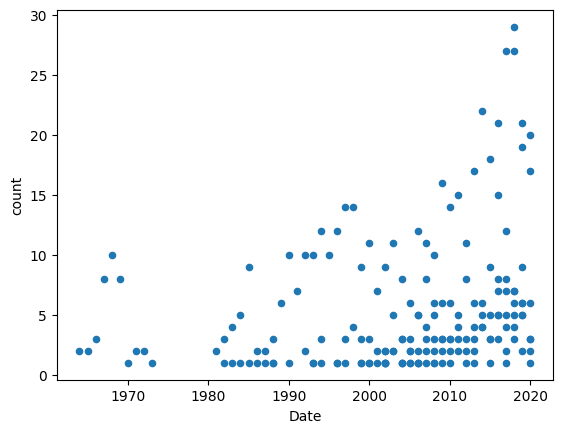

In [713]:
country_launch_per_year.plot(x='Date',y='count',kind="scatter")

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

C:\Users\hboyz\AppData\Local\Temp\ipykernel_43224\2005944446.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: >

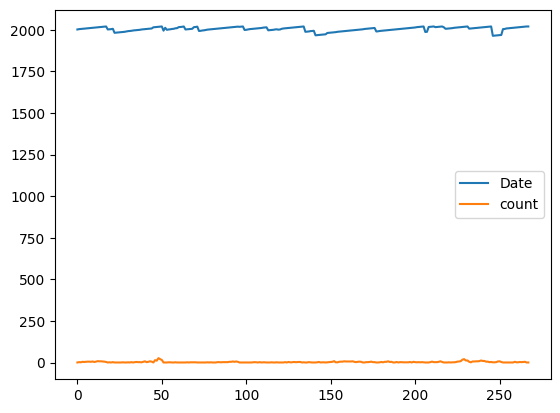

In [732]:
top_org = clean_df[['Date','Organisation']]
top_org['Date'] = top_org['Date'].apply(lambda x: int(x.split()[3]))
top_org = top_org.groupby(['Organisation','Date']).agg(count=('Date','count')).reset_index().sort_index()
top_org.plot()